<a href="https://colab.research.google.com/github/clau17be/Predict-Price-Insurances/blob/main/dataset_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> This is the link for the dataset in the Kaggle competition https://www.kaggle.com/competitions/playground-series-s4e12

In [3]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [20]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()
#print(df.shape)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [21]:
import seaborn as sns
df.info()
# Check for missing values in each column
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

,0
id,0
Age,18705
Gender,0
Annual Income,44949
Marital Status,18529
Number of Dependents,109672
Education Level,0
Occupation,358075
Health Score,74076
Location,0


In [22]:
df = df.dropna() # Quitamos los na
#df_numeric1 = df_numeric.fillna(df_numeric.mean(numeric_only=True))
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 384004 entries, 0 to 1199990
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    384004 non-null  int64  
 1   Age                   384004 non-null  float64
 2   Gender                384004 non-null  object 
 3   Annual Income         384004 non-null  float64
 4   Marital Status        384004 non-null  object 
 5   Number of Dependents  384004 non-null  float64
 6   Education Level       384004 non-null  object 
 7   Occupation            384004 non-null  object 
 8   Health Score          384004 non-null  float64
 9   Location              384004 non-null  object 
 10  Policy Type           384004 non-null  object 
 11  Previous Claims       384004 non-null  float64
 12  Vehicle Age           384004 non-null  float64
 13  Credit Score          384004 non-null  float64
 14  Insurance Duration    384004 non-null  float64
 15  Poli

<Axes: xlabel='Premium Amount', ylabel='Count'>

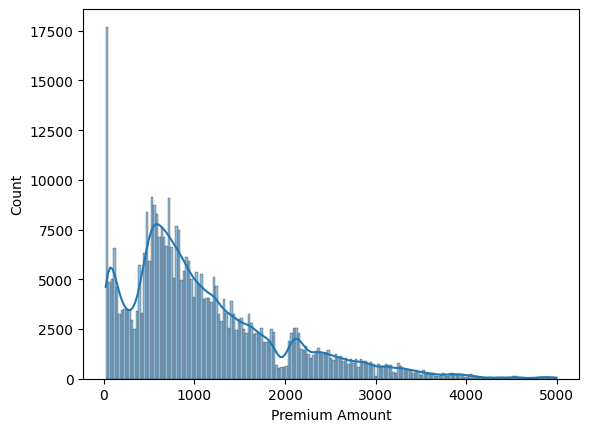

In [23]:
import seaborn as sns
sns.histplot(df['Premium Amount'], kde=True)

In [ ]:
#df_numeric = df1.select_dtypes(include=['number'])  # solo columnas numéricas

Selected the Text variables and converted into dummy variables for each internal value, making them numerical and suitable for the model.

In [26]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

cat_cols = ['Marital Status', 'Gender', 'Education Level', 'Occupation', 'Location',
            'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(df[cat_cols])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(cat_cols))

df_final = pd.concat([df.drop(columns=cat_cols).reset_index(drop=True), X_encoded_df], axis=1)


We still needed to encode the date variable, but since the process was too time-consuming, we decided to remove the column."

In [27]:
df_numeric = df_final.select_dtypes(include=['number'])  # solo columnas numéricas
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384004 entries, 0 to 384003
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           384004 non-null  int64  
 1   Age                          384004 non-null  float64
 2   Annual Income                384004 non-null  float64
 3   Number of Dependents         384004 non-null  float64
 4   Health Score                 384004 non-null  float64
 5   Previous Claims              384004 non-null  float64
 6   Vehicle Age                  384004 non-null  float64
 7   Credit Score                 384004 non-null  float64
 8   Insurance Duration           384004 non-null  float64
 9   Premium Amount               384004 non-null  float64
 10  Marital Status_Divorced      384004 non-null  float64
 11  Marital Status_Married       384004 non-null  float64
 12  Marital Status_Single        384004 non-null  float64
 13 

In [56]:
# Filtrar: quedarse solo con el 5% inferior y el 5% superior
df1 = df_numeric[(df_numeric['Premium Amount'] >= 500) & (df['Premium Amount'] <= 3500)]

<Axes: xlabel='Premium Amount', ylabel='Count'>

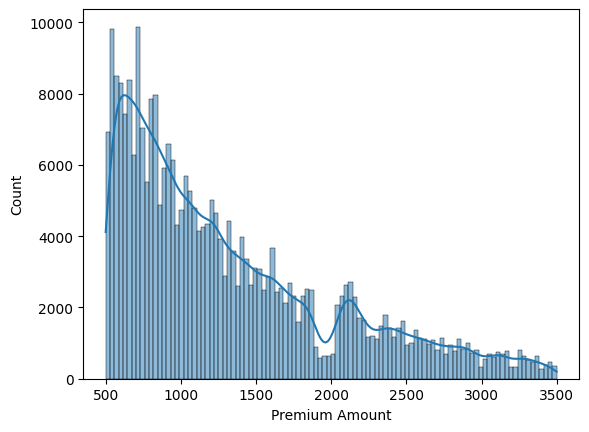

In [57]:
import seaborn as sns
sns.histplot(df1['Premium Amount'], kde=True)

Se quiere ver la distribucion de target so it can give a better idea what model can work better with this tipe of data

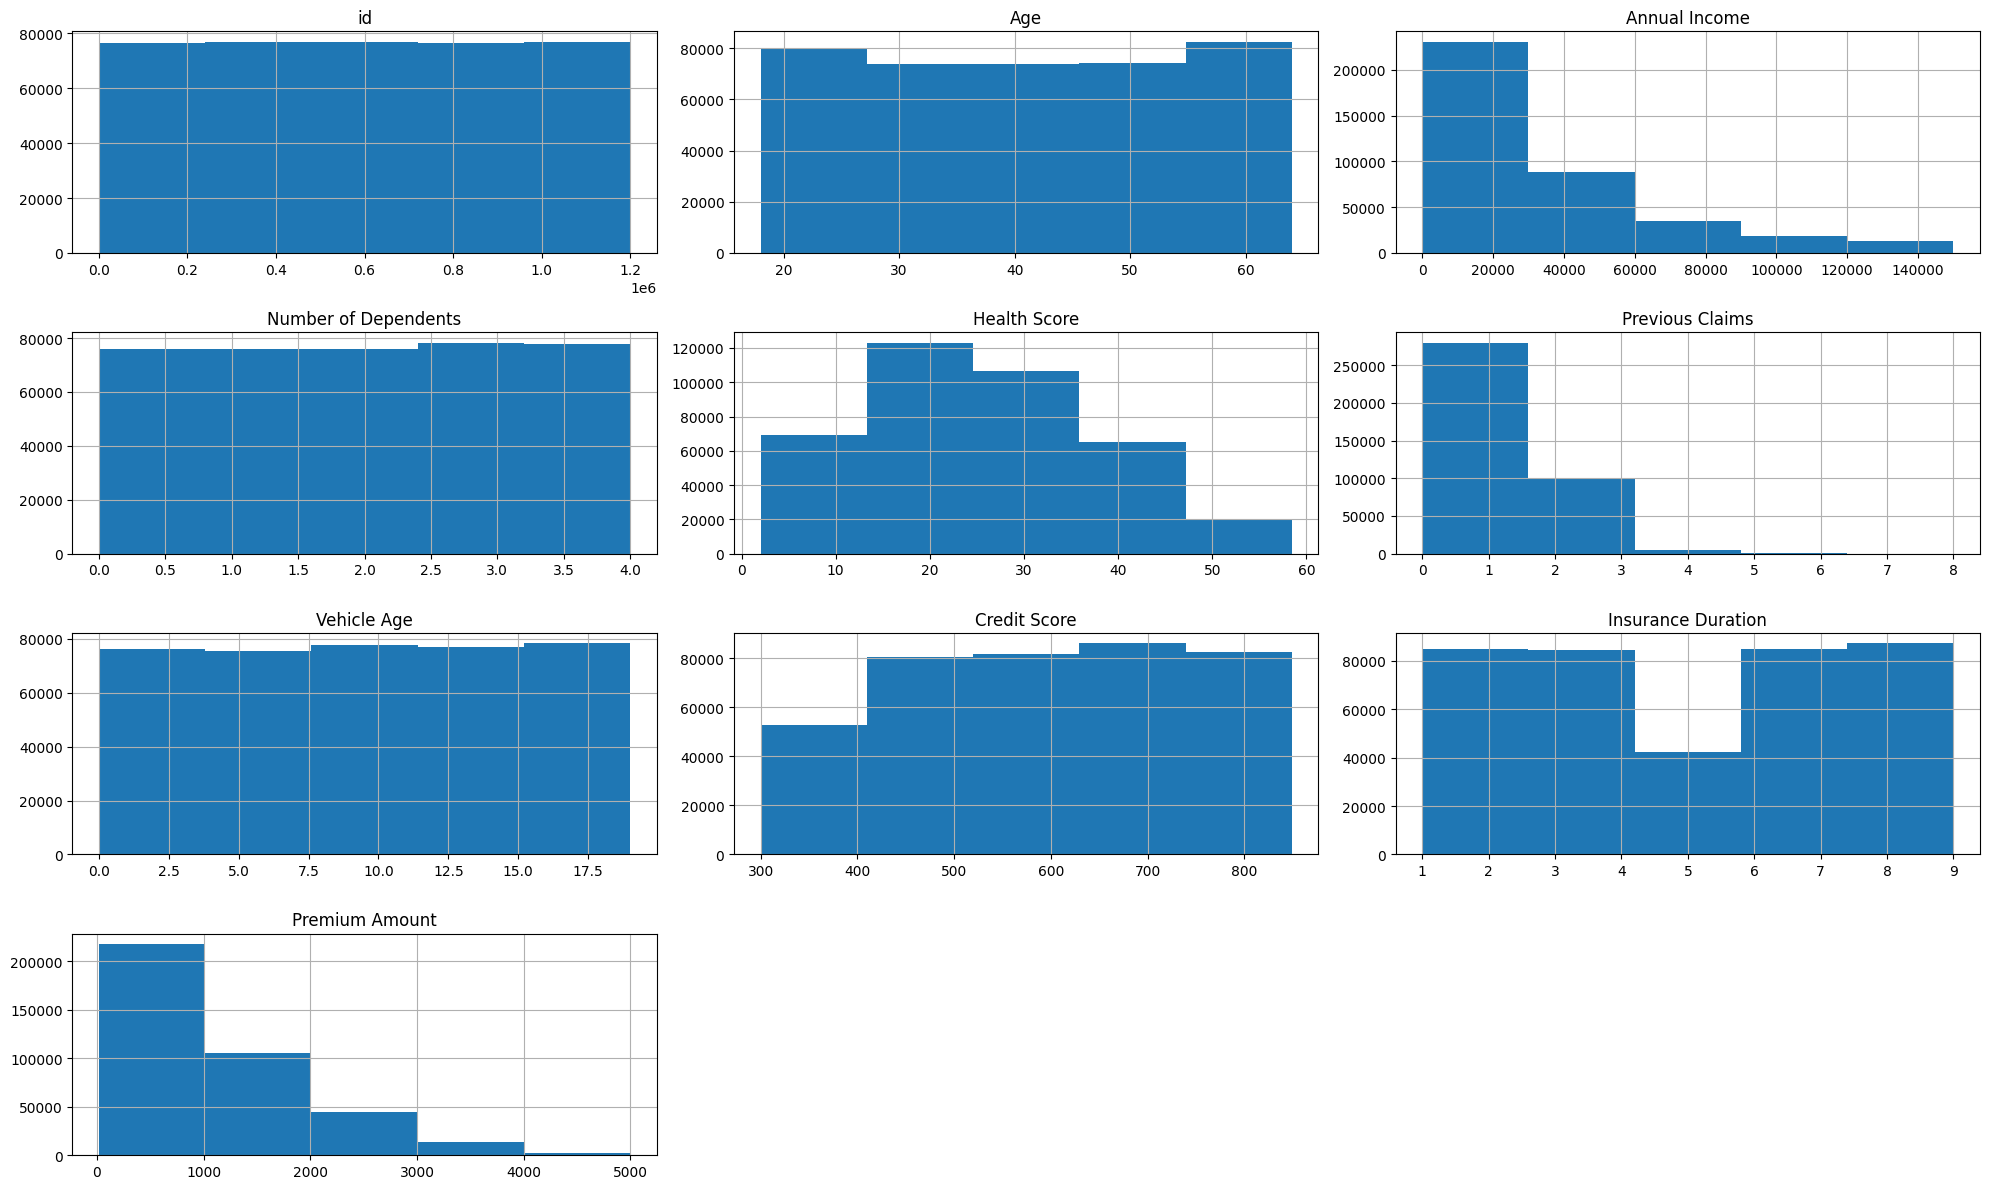

In [34]:
# Plot histograms for numeric features
import matplotlib.pyplot as plt
df.hist(bins=5, figsize=(20, 12))
plt.tight_layout()
plt.show()

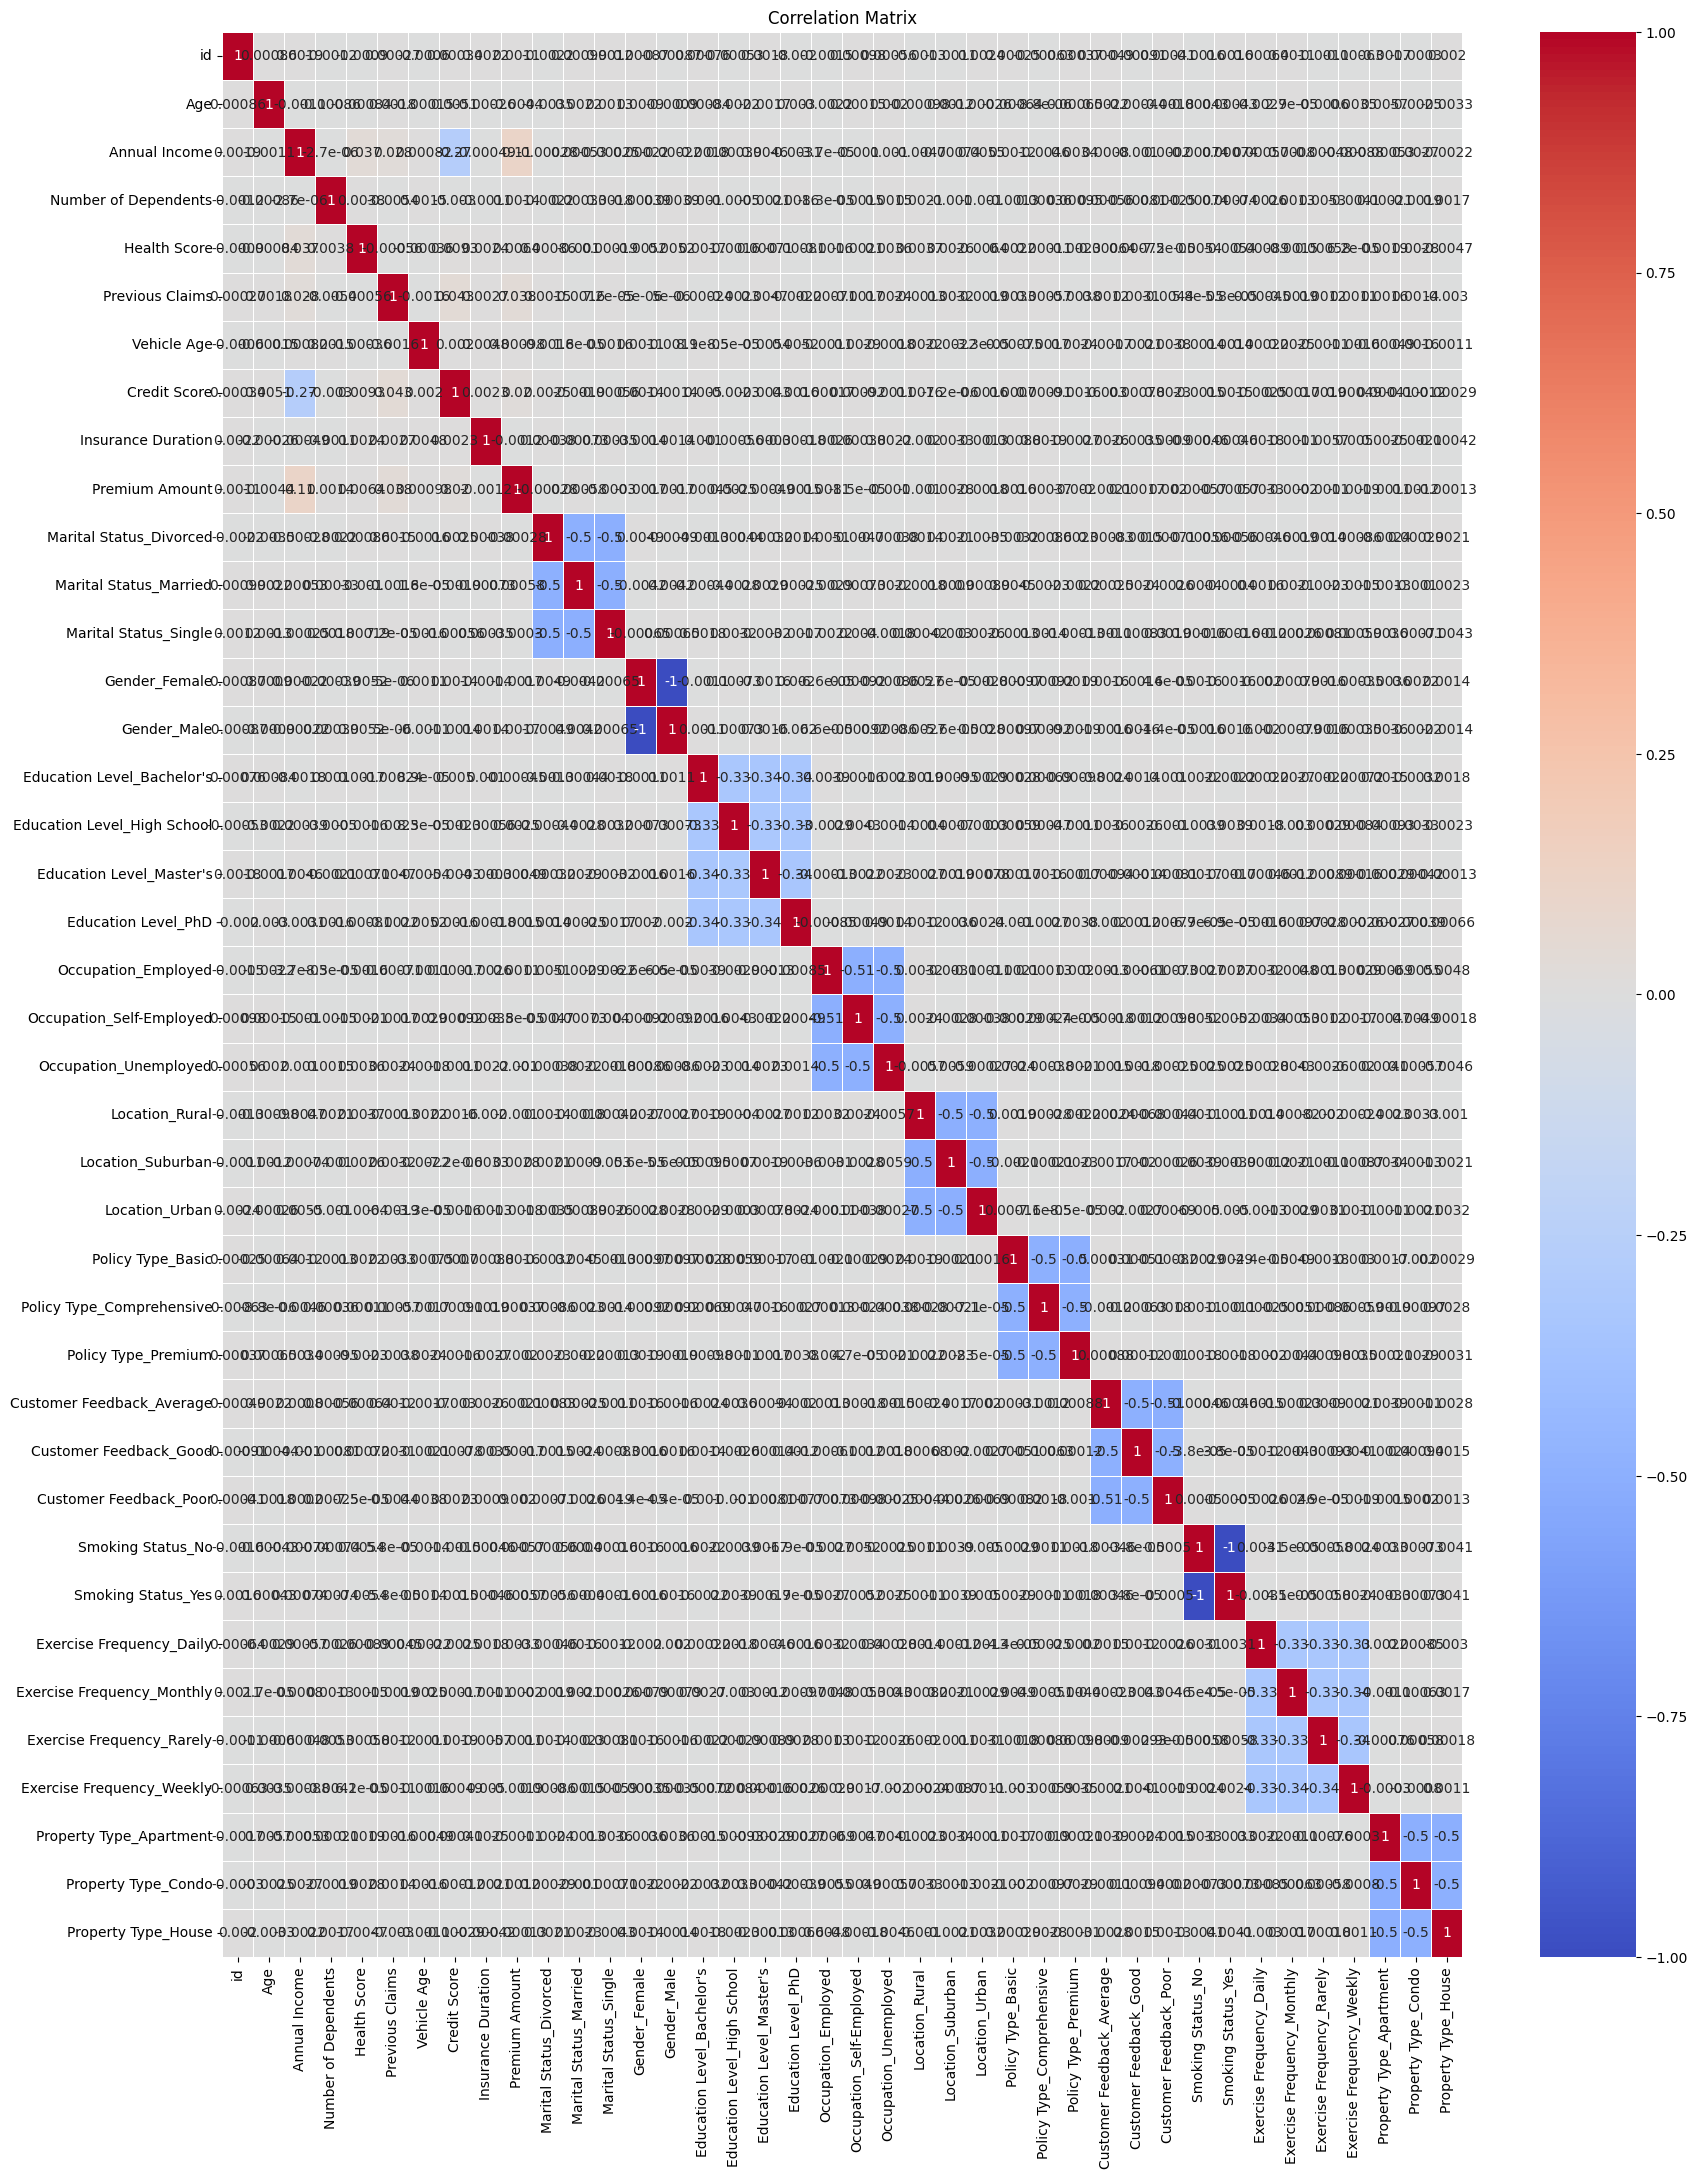

In [58]:
# Compute correlation matrix
corr_matrix = df1.corr()

# Generate a heatmap of the correlations
plt.figure(figsize=(20, 25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Red positive correlation As one variable increases, the other variable also increases.
# Blue negative correlation As one variable increases, the other variable decreases.
# Zero correlation (white or near-white): There is no significant relationship between the two variables.
# 0 to 0.3: Weak or no correlation.
# 0.3 to 0.7: Moderate positive correlation.
# 0.7 to 1.0: Strong positive correlation.
# -0.3 to -0.7: Moderate negative correlation.
# -0.7 to -1.0: Strong negative correlation.

# If two features have a high positive correlation, you might consider removing one of them to avoid
# multicollinearity (i.e., when two features are too similar, which can lead to problems in some
# machine learning models).

In [61]:
df = df1.drop(columns=['id','Marital Status_Divorced','Marital Status_Single','Gender_Female','Education Level_High School','Education Level_PhD','Occupation_Self-Employed',
                      'Occupation_Unemployed','Location_Rural','Location_Suburban','Policy Type_Basic','Policy Type_Comprehensive','Customer Feedback_Good',
                      'Exercise Frequency_Daily','Exercise Frequency_Monthly','Exercise Frequency_Rarely','Customer Feedback_Poor','Smoking Status_No','Property Type_Condo',
                      'Property Type_House'])
#df2 = df_numeric1.drop(columns=['id'])

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 285530 entries, 0 to 384002
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         285530 non-null  float64
 1   Annual Income               285530 non-null  float64
 2   Number of Dependents        285530 non-null  float64
 3   Health Score                285530 non-null  float64
 4   Previous Claims             285530 non-null  float64
 5   Vehicle Age                 285530 non-null  float64
 6   Credit Score                285530 non-null  float64
 7   Insurance Duration          285530 non-null  float64
 8   Premium Amount              285530 non-null  float64
 9   Marital Status_Married      285530 non-null  float64
 10  Gender_Male                 285530 non-null  float64
 11  Education Level_Bachelor's  285530 non-null  float64
 12  Education Level_Master's    285530 non-null  float64
 13  Occupation_Employed

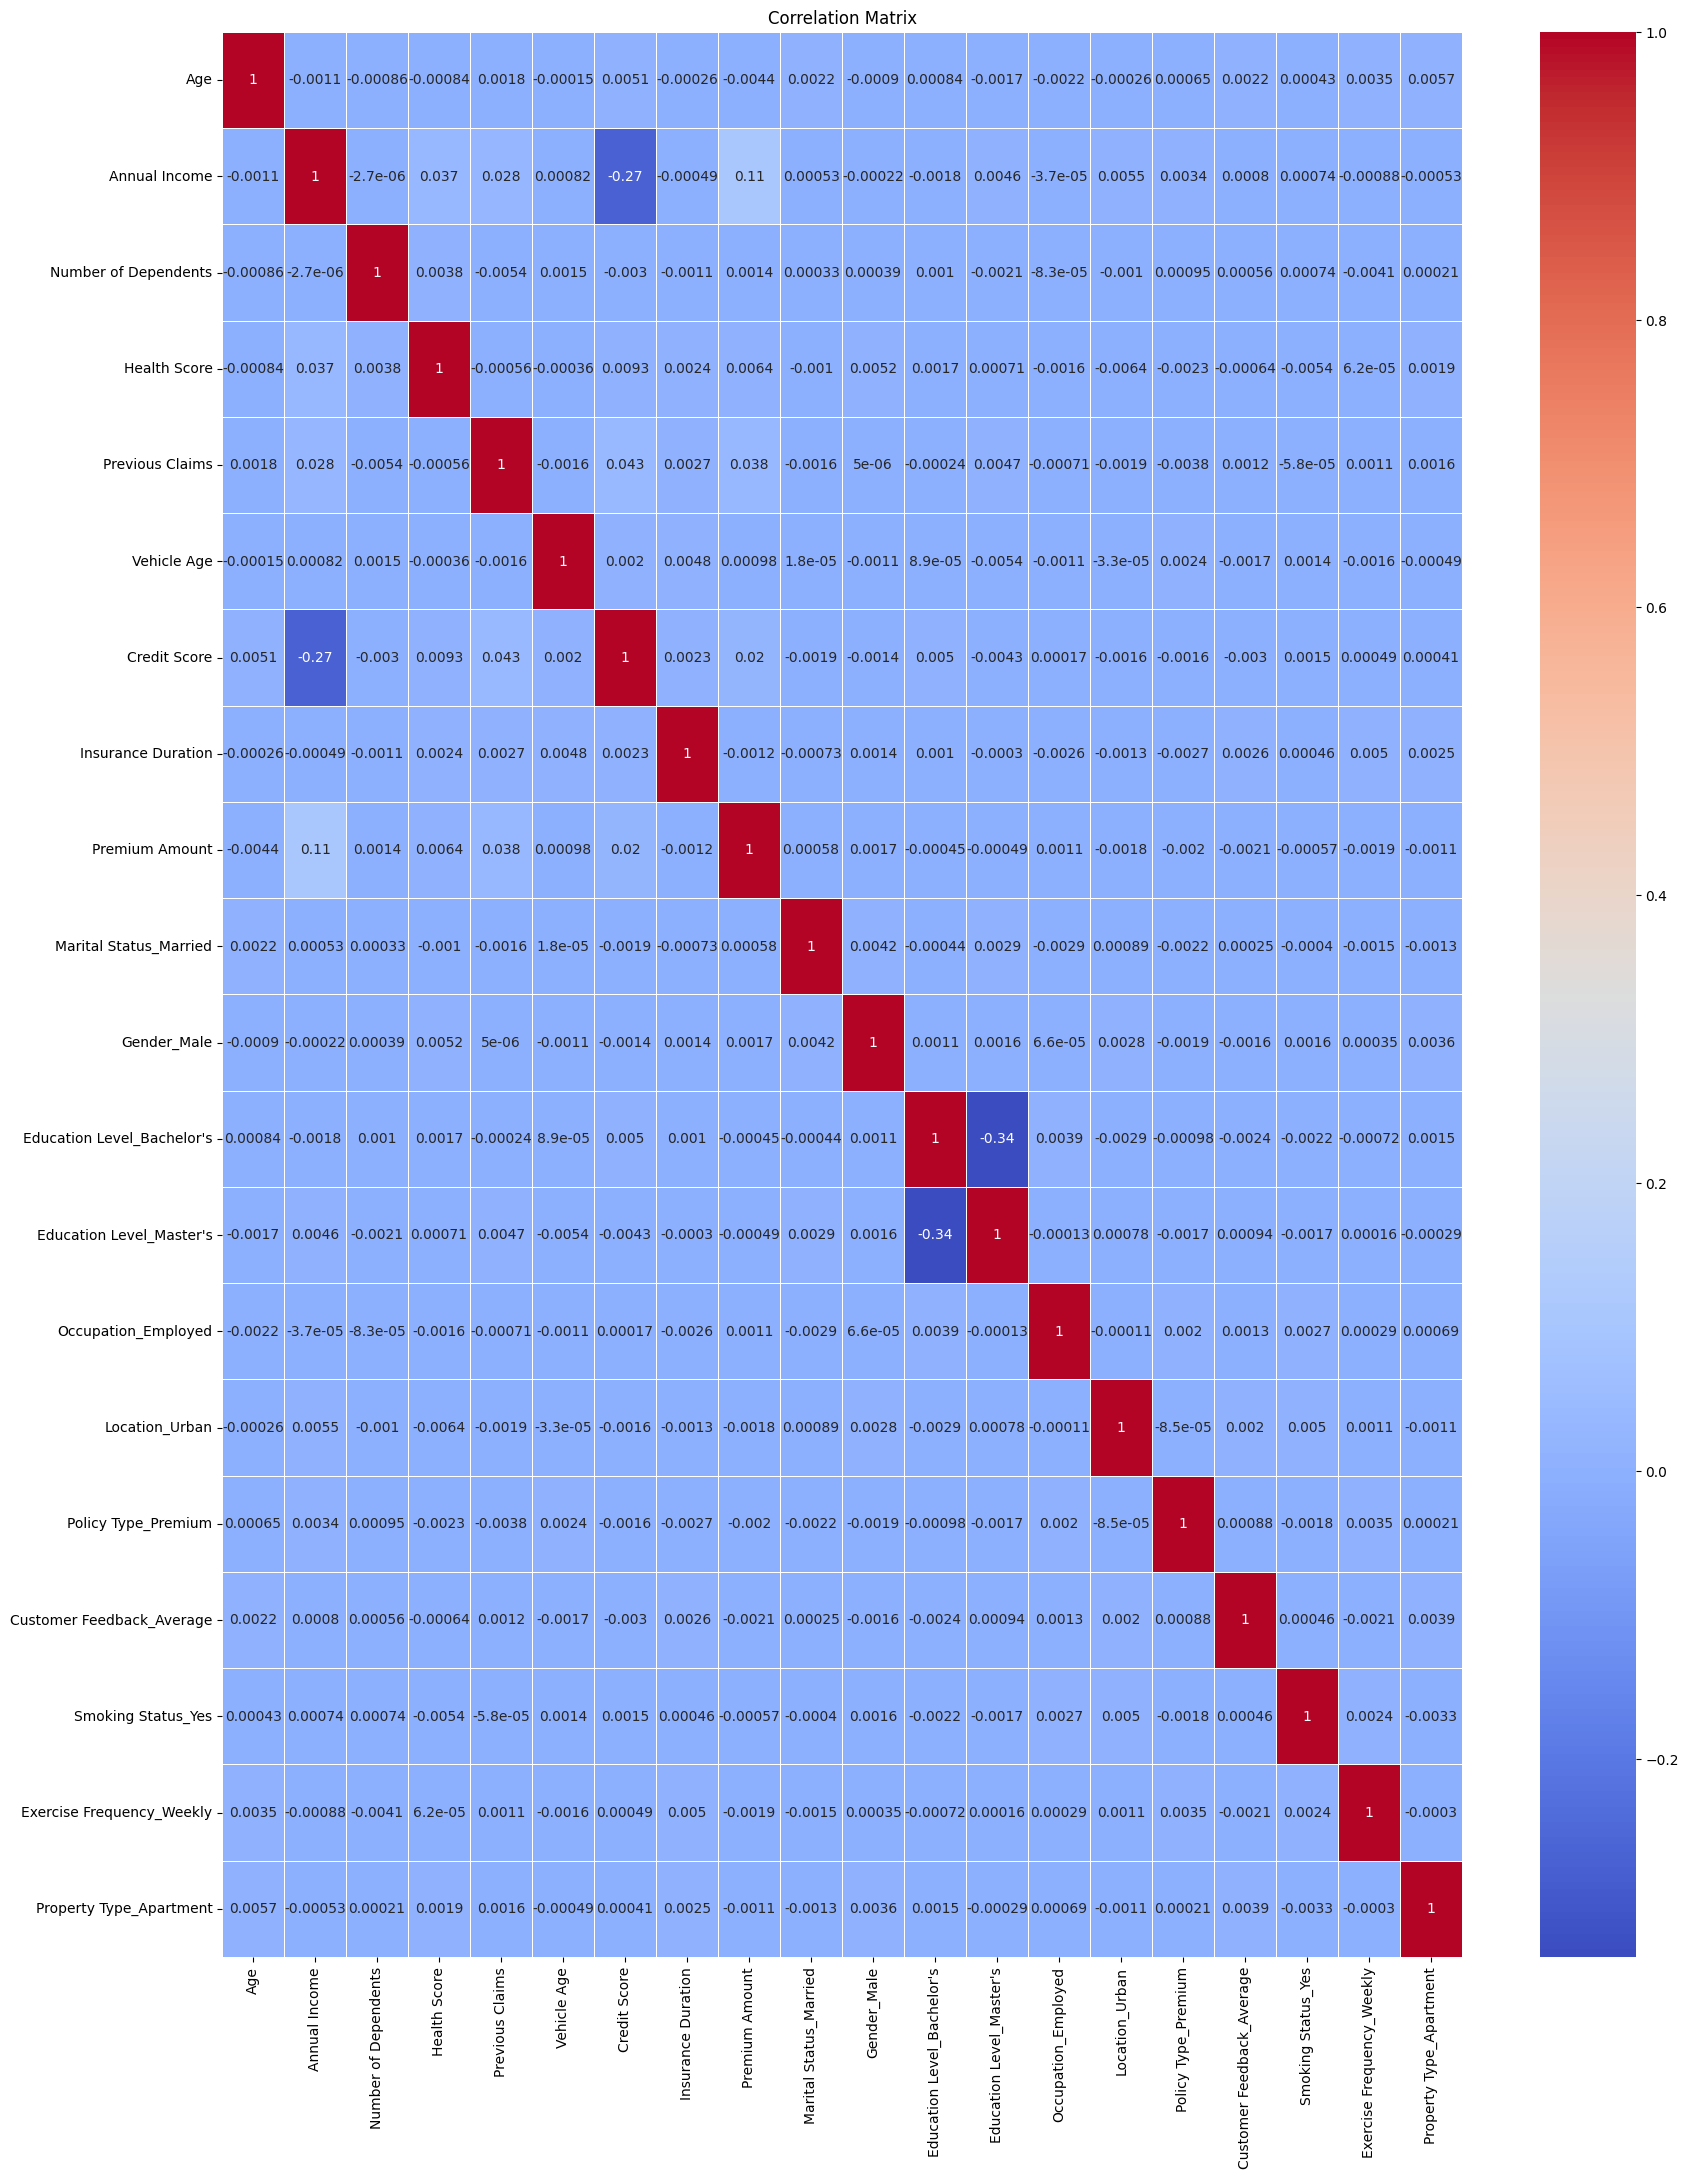

In [63]:
# Compute correlation matrix
corr_matrix = df.corr()

# Generate a heatmap of the correlations
plt.figure(figsize=(20, 25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Red positive correlation As one variable increases, the other variable also increases.
# Blue negative correlation As one variable increases, the other variable decreases.
# Zero correlation (white or near-white): There is no significant relationship between the two variables.
# 0 to 0.3: Weak or no correlation.
# 0.3 to 0.7: Moderate positive correlation.
# 0.7 to 1.0: Strong positive correlation.
# -0.3 to -0.7: Moderate negative correlation.
# -0.7 to -1.0: Strong negative correlation.

# If two features have a high positive correlation, you might consider removing one of them to avoid
# multicollinearity (i.e., when two features are too similar, which can lead to problems in some
# machine learning models).

In [64]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix["Premium Amount"].sort_values(ascending=False)

,Premium Amount
Premium Amount,1.000000
Annual Income,0.110113
Previous Claims,0.037601
Credit Score,0.019925
Health Score,0.006364
Gender_Male,0.001682
Number of Dependents,0.001415
Occupation_Employed,0.001087
Vehicle Age,0.000977
Marital Status_Married,0.000582


In [ ]:
#df.to_csv('mi_archivo.csv', index=False)
#from google.colab import files
#files.download('mi_archivo.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [65]:
df = df.drop(columns=["Marital Status_Married","Vehicle Age","Customer Feedback_Average","Education Level_Master's"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 285530 entries, 0 to 384002
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         285530 non-null  float64
 1   Annual Income               285530 non-null  float64
 2   Number of Dependents        285530 non-null  float64
 3   Health Score                285530 non-null  float64
 4   Previous Claims             285530 non-null  float64
 5   Credit Score                285530 non-null  float64
 6   Insurance Duration          285530 non-null  float64
 7   Premium Amount              285530 non-null  float64
 8   Gender_Male                 285530 non-null  float64
 9   Education Level_Bachelor's  285530 non-null  float64
 10  Occupation_Employed         285530 non-null  float64
 11  Location_Urban              285530 non-null  float64
 12  Policy Type_Premium         285530 non-null  float64
 13  Smoking Status_Yes 

In [66]:
# Define your features (X) and target variable (y)
X = df.drop('Premium Amount', axis=1)  # All columns except 'target'
y = df['Premium Amount']  # The target column

In [67]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit and transform the training data, then transform the testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# 6. Hacer predicciones sobre el test
y_pred = lr_model.predict(X_test_scaled)

In [71]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
nn_model = MLPRegressor(hidden_layer_sizes=(32,), max_iter=200, random_state=42)
nn_model.fit(X_train_scaled, y_train)
y_pred_nn = nn_model.predict(X_test_scaled)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [72]:
print("📊 Model Comparison (Validation Set)\n")

print("🔹 Linear Regression")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

print("\n🔹 Neural Network (MLPRegressor)")
print("MSE:", mean_squared_error(y_test, y_pred_nn))
print("R²:", r2_score(y_test, y_pred_nn))

📊 Model Comparison (Validation Set)

🔹 Linear Regression
MSE: 500174.1665588951
R²: 0.01626148959327356

🔹 Neural Network (MLPRegressor)
MSE: 469650.549272304
R²: 0.0762950935043234
